#Name: Ravi yadav

In [356]:
!pip install imbalanced-learn

In [357]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
df=pd.read_csv("/content/drive/MyDrive/wine.csv")

In [358]:
df.shape

(177, 14)

In [359]:
df.isnull().sum()

Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
Wine Class                      0
dtype: int64

###so there are No null values

In [360]:
df.columns

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline', 'Wine Class'],
      dtype='object')

In [361]:
df.rename(columns={'OD280/OD315 of diluted wines':'dilute_wine'},inplace=True)

In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               177 non-null    float64
 1   Malic acid            177 non-null    float64
 2   Ash                   177 non-null    float64
 3   Alcalinity of ash     177 non-null    float64
 4   Magnesium             177 non-null    int64  
 5   Total phenols         177 non-null    float64
 6   Flavanoids            177 non-null    float64
 7   Nonflavanoid phenols  177 non-null    float64
 8   Proanthocyanins       177 non-null    float64
 9   Color intensity       177 non-null    float64
 10  Hue                   177 non-null    float64
 11  dilute_wine           177 non-null    float64
 12  Proline               177 non-null    int64  
 13  Wine Class            177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


####so all the features are either float or int

In [363]:
df.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,dilute_wine,Proline,Wine Class
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045,1.943503
std,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046,0.773991
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000,1.000000
50%,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000,2.000000
75%,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [364]:
df['Wine Class'].unique()

array([1, 2, 3])

####Converting the Wine Class to an object type

In [365]:
#df['Wine Class']=df['Wine Class'].astype('category')

In [366]:
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,dilute_wine,Proline,Wine Class
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1


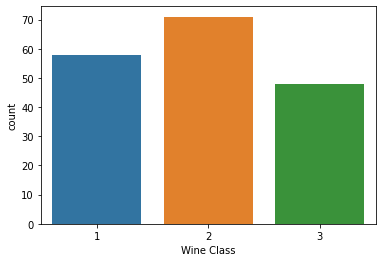

In [367]:
sns.countplot(df['Wine Class'])

###So we can see that the Wine with class 2 has larger count as compared to the class 1 and 3 ,where 3 is the least.

#Univariate Analysis

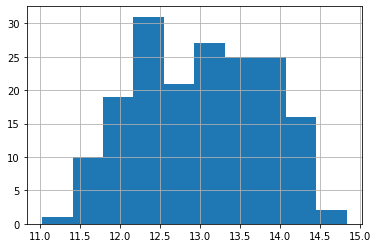

In [368]:
df['Alcohol'].hist()

###It is almost following a normal distribution.

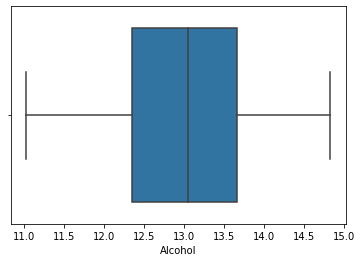

In [369]:
sns.boxplot(x=df['Alcohol'],hue=df['Wine Class'])

###and also not having any outliers.

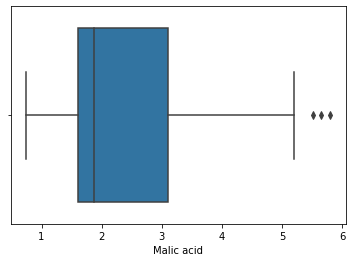

In [370]:
sns.boxplot(x=df['Malic acid'])

####Malic acid is having 3 outliers

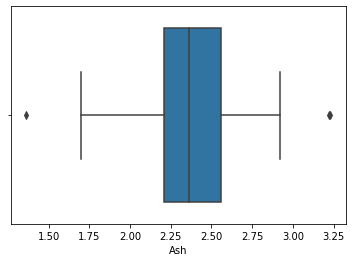

In [371]:
sns.boxplot(x=df['Ash'])


###'Ash' is also having 2 Outliers

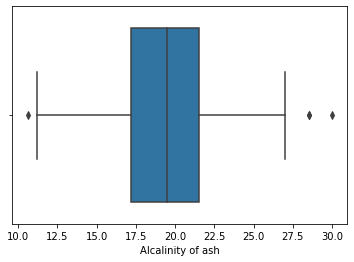

In [372]:
sns.boxplot(x=df['Alcalinity of ash'])

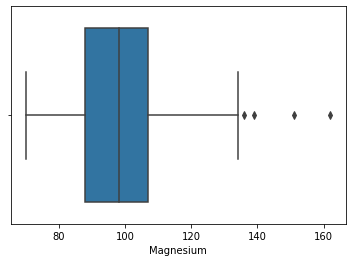

In [373]:
sns.boxplot(x=df['Magnesium'])

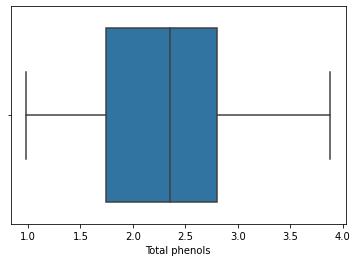

In [374]:
sns.boxplot(x=df['Total phenols'])

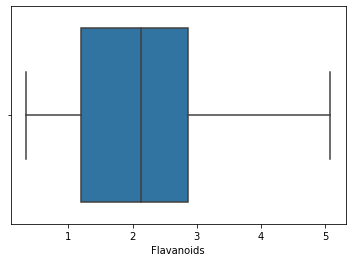

In [375]:
sns.boxplot(x=df['Flavanoids'])

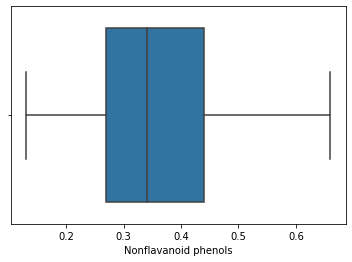

In [376]:
sns.boxplot(x=df['Nonflavanoid phenols'])

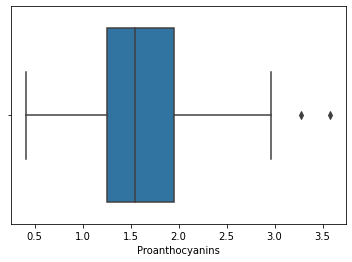

In [377]:
sns.boxplot(x=df['Proanthocyanins'])

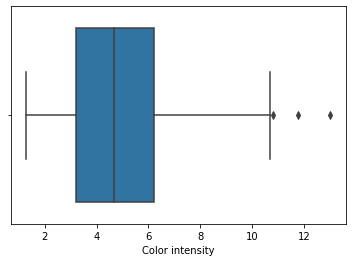

In [378]:
sns.boxplot(x=df['Color intensity'])

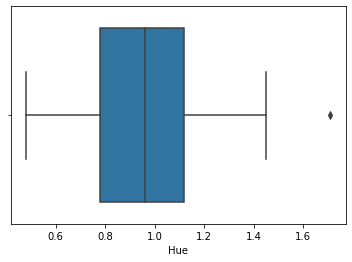

In [379]:
sns.boxplot(x=df['Hue'])

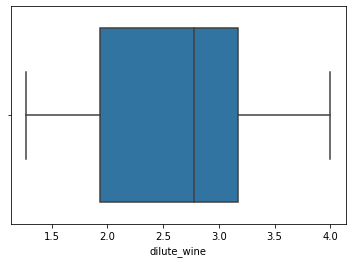

In [380]:
sns.boxplot(x=df['dilute_wine'])

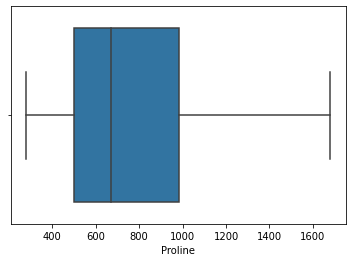

In [381]:
sns.boxplot(x=df['Proline'])

###So the overall anylasis we can say that our data has very less outliers in which columns such as 'Hue' ,'Color intensity' ,'Proanthocyanins' ,'Magnesium' ,'Alcalinity of ash','Ash', 'Malic Acid' are the some which are having 3 or 4 outliers otherwise the data set is free from outliers.


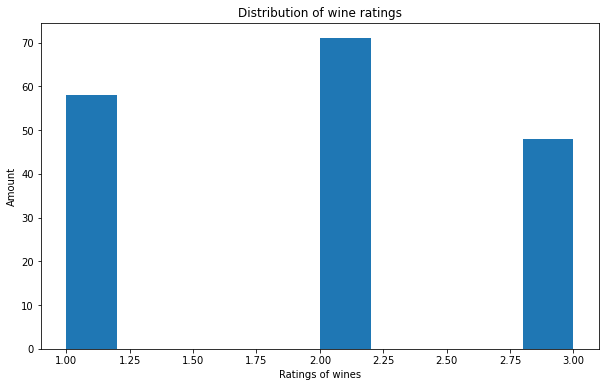

In [382]:
fig = plt.figure(figsize = (10,6))
plt.hist(df["Wine Class"].values, range=(1,3))
plt.xlabel('Ratings of wines')
plt.ylabel('Amount')
plt.title('Distribution of wine ratings')
plt.show()

#Bivariate Anylasis

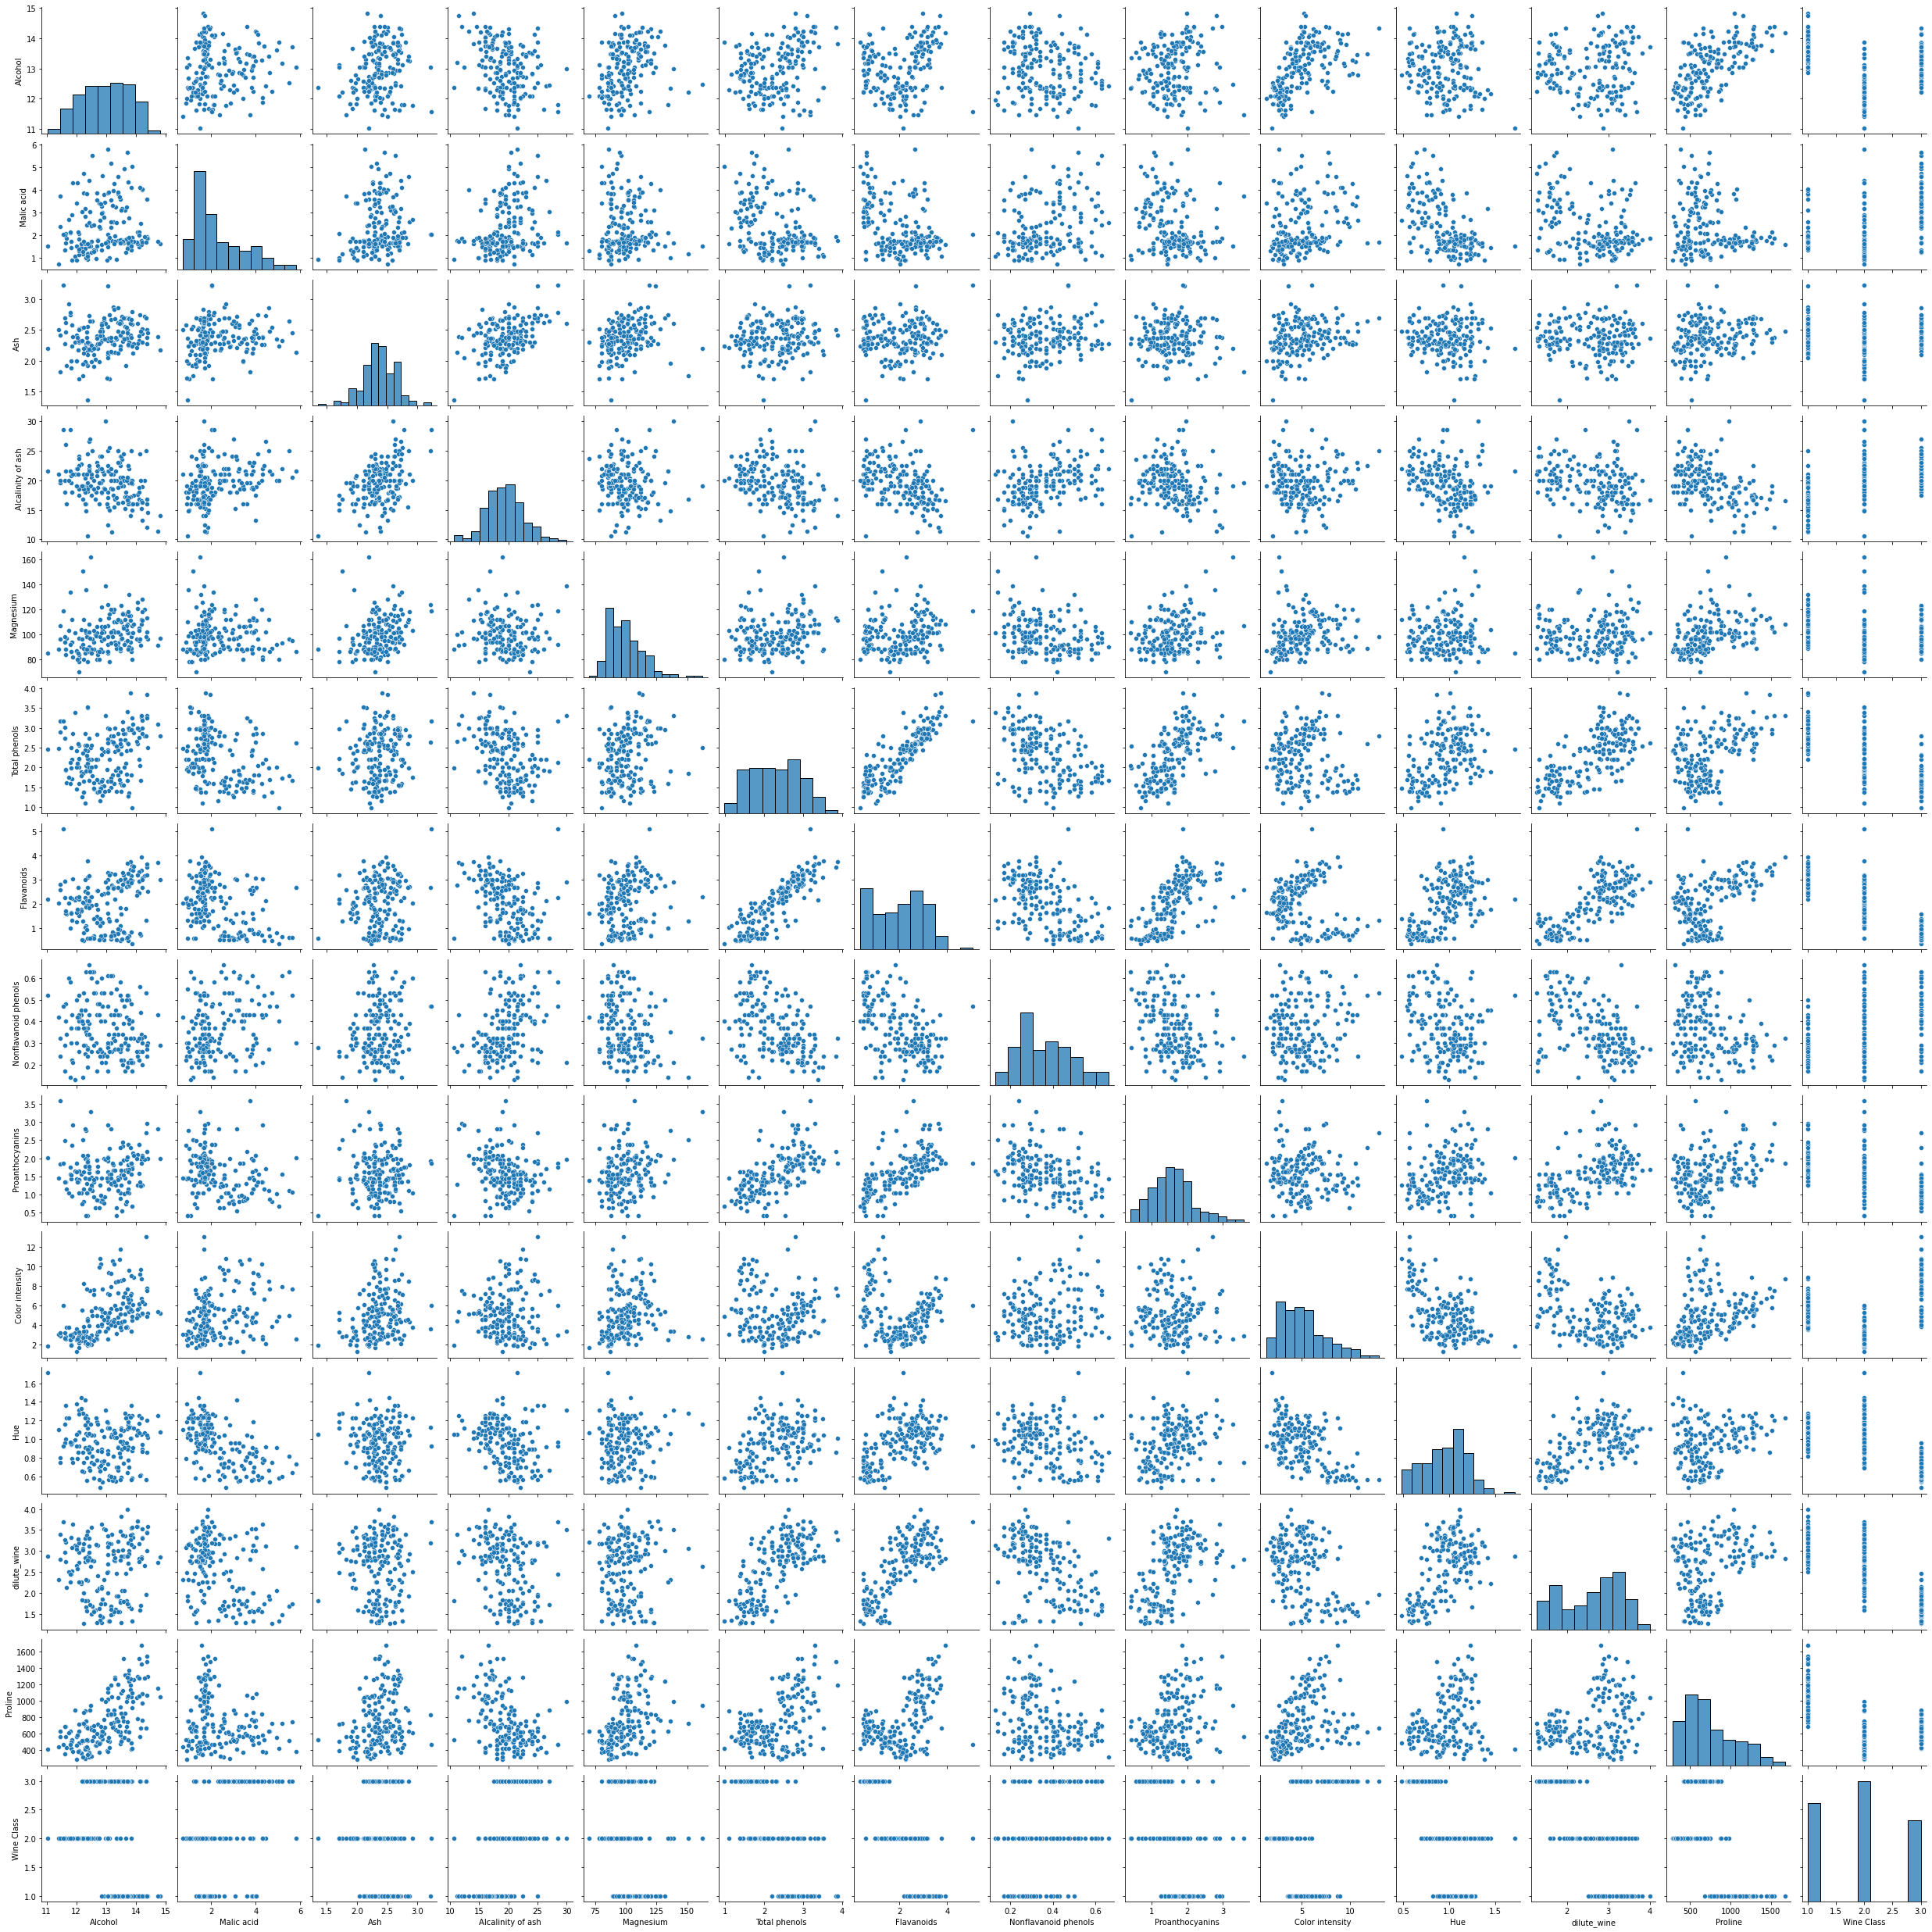

In [383]:
sns.pairplot(df)

###It is evident from the Above graph most of our features of data is forming a normal distribution which also some of the features like Magnesium and Malic acid are slightly right skwed.

#Checking for the correlation in the dataset with our target column Wine class.

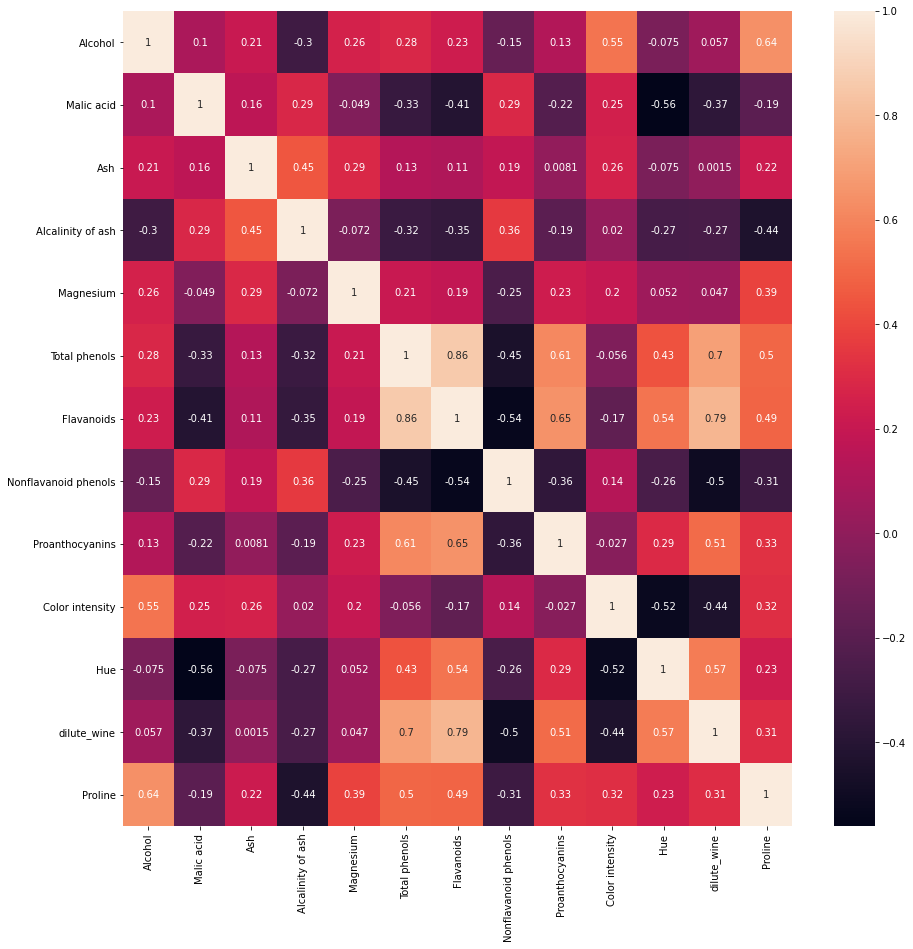

In [384]:
df_=df.drop('Wine Class',axis=1)
df_corr=df_.corr()
plt.figure(figsize=(15,15))
sns.heatmap(df_corr,annot=True)

###So we can see there is a issue of multicollinearity i.e. features such as Alcohol,Total Phenols,Flavanoids are showing correlation which could not good if we are trying to analyse the effect of particular features but if we are only concern with the Prediction we can simple ignore it.

Text(0.5, 1.0, 'Malic acid and Wine class')

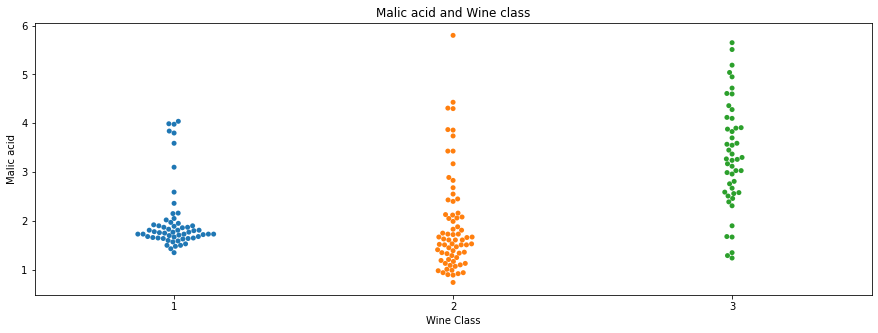

In [385]:
plt.figure(figsize=(15,5))
sns.swarmplot(x= "Wine Class", y="Malic acid" , data = df) 
plt.title('Malic acid and Wine class')

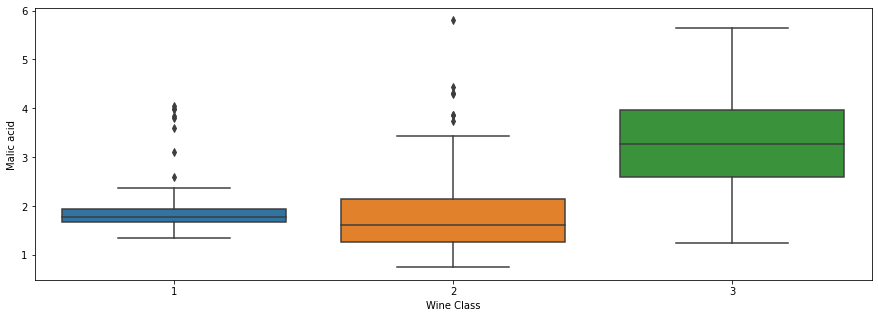

In [386]:
plt.figure(figsize=(15,5))
sns.boxplot(x= "Wine Class", y="Malic acid" , data = df) 

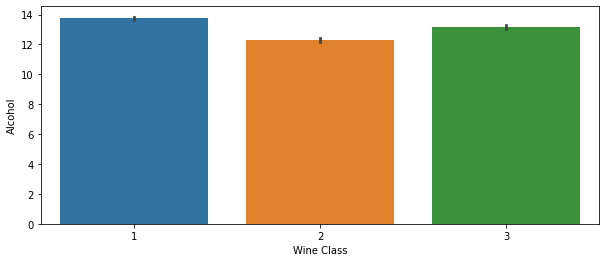

In [387]:
plt.figure(figsize=(10,4))
sns.barplot(x= "Wine Class", y="Alcohol" , data = df )

####So we can infer that Alcohol content is approximatly equal in all the 3 Wine Classes. 

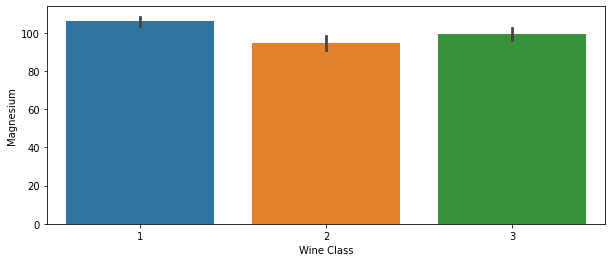

In [388]:
plt.figure(figsize=(10,4))
sns.barplot(x= "Wine Class", y="Magnesium" , data = df )

###Magnesium is More in Class 1 in comparison to Class 2 and 3.

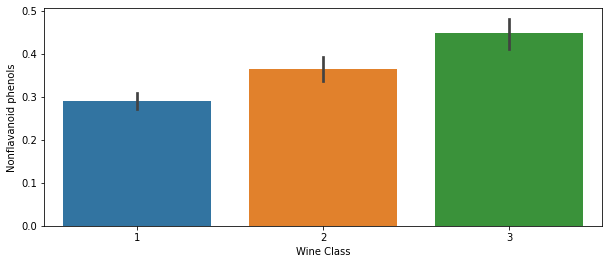

In [389]:
plt.figure(figsize=(10,4))
sns.barplot(x= "Wine Class", y="Nonflavanoid phenols" , data = df )

###So we can infer that the amount of ash is less in class 1 in comparison with the Wine Class 2 and 3.

#Task2 Machine learning

#Finally checking the Features Normaly distributed or Not Using [Q-Q plot] 

In [390]:
import scipy.stats as stat
import pylab

def plot_data(df,feature):
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  df[feature].hist()
  plt.subplot(1,2,2)
  stat.probplot(df[feature],dist='norm',plot=pylab)

Alcohol
Malic acid
Ash
Alcalinity of ash
Magnesium
Total phenols
Flavanoids
Nonflavanoid phenols
Proanthocyanins
Color intensity
Hue
dilute_wine
Proline


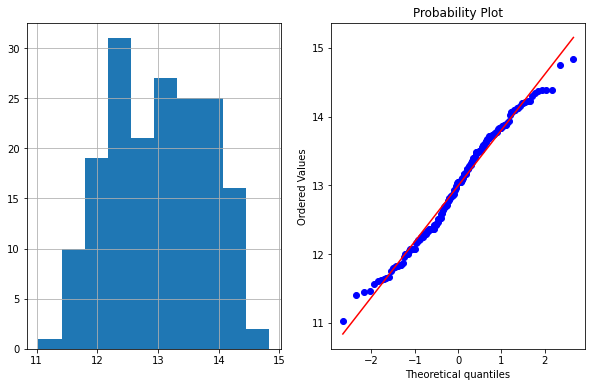

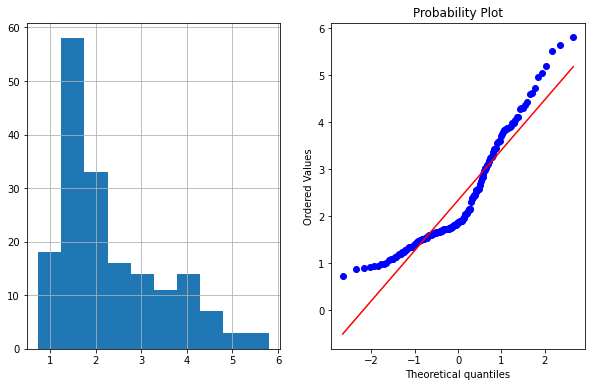

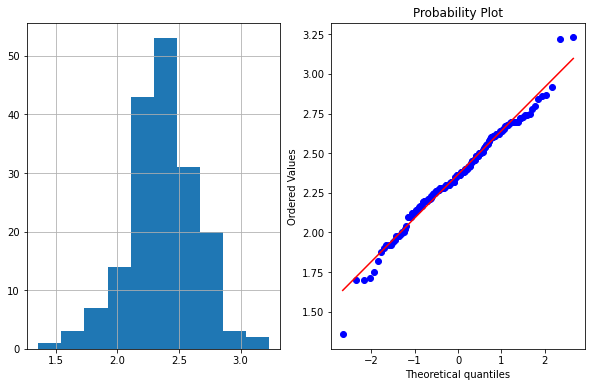

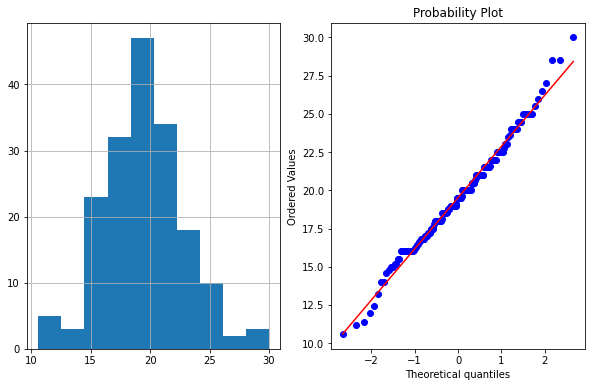

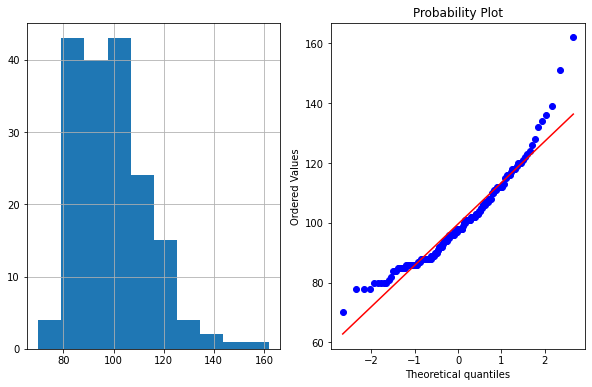

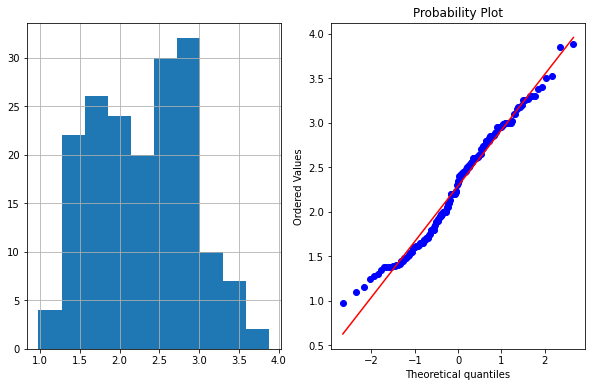

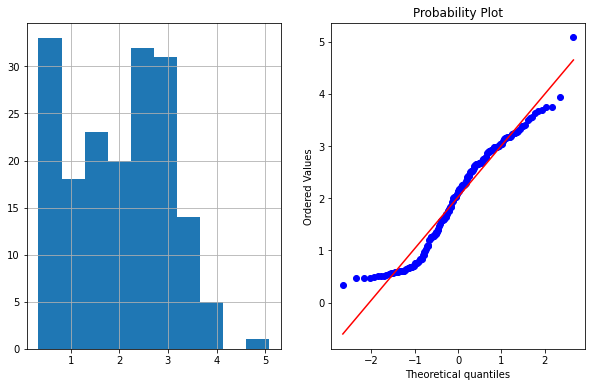

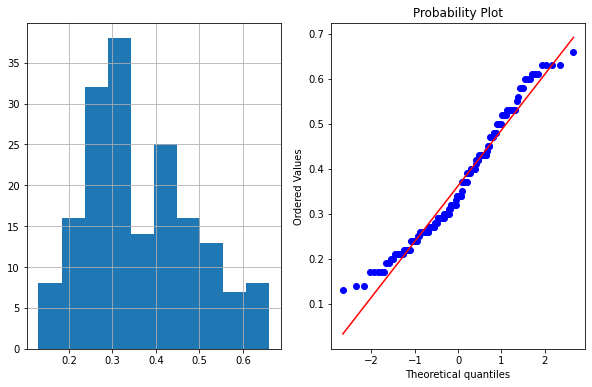

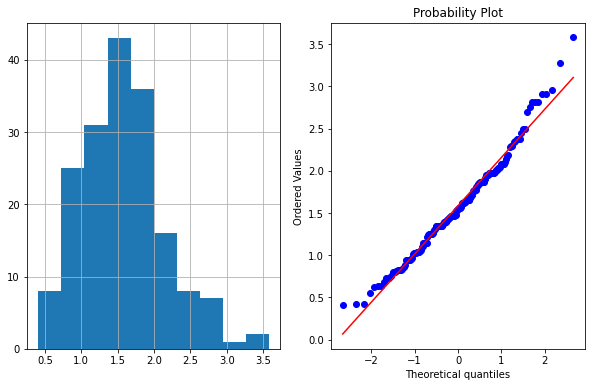

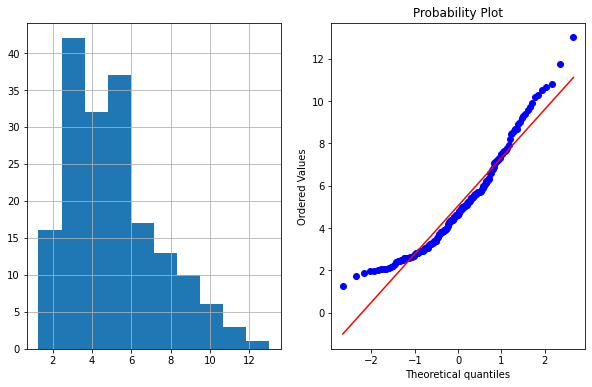

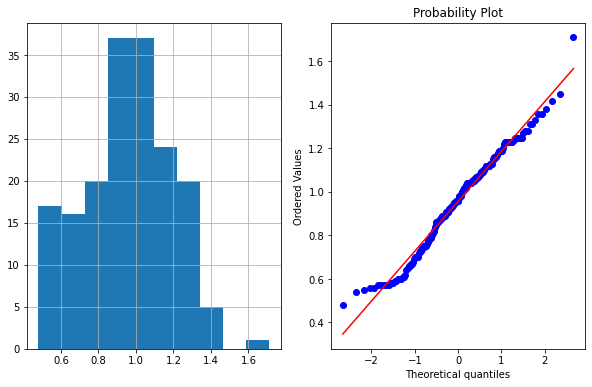

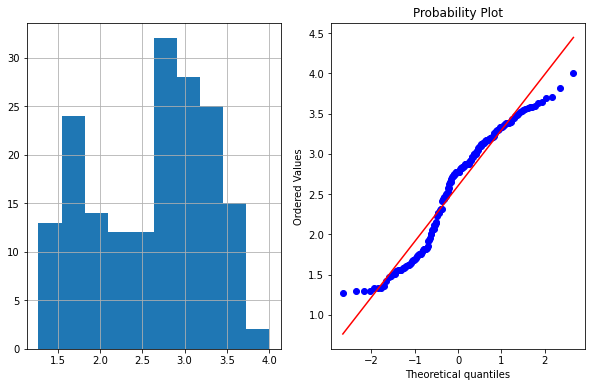

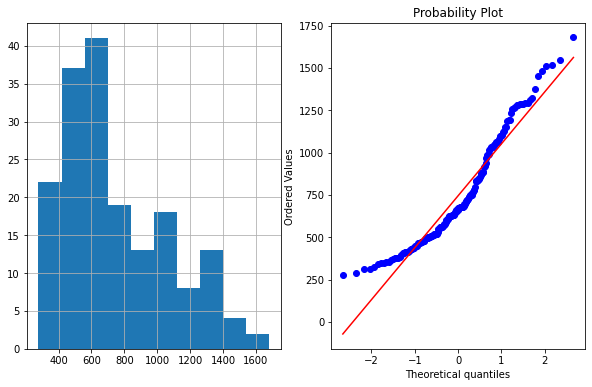

In [391]:
for col in data.columns:
  print(col)
  plot_data(df,col)
 

####So far so good, it is clear that our all features are following a normal distribution so no need for applying any transformation.

###Handiling Nan values and replacing it with median assuming that data is missing completely at random

In [392]:

data=df.drop('Wine Class',axis=1)
for cols in data.columns:
  df[cols]=df[cols].fillna(df[cols].median())

#Balancing the Dataset

In [393]:
df['Wine Class'].value_counts()

2    71
1    58
3    48
Name: Wine Class, dtype: int64

In [394]:
X=df.drop('Wine Class', axis=1)
y=df['Wine Class']

In [395]:
X.isna().sum()

Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
dilute_wine             0
Proline                 0
dtype: int64

In [396]:
y.isna().sum()

0

#Using SMOTE for Oversampling

In [397]:
# SO, the dataset is quit imbalance so applying Oversampling as the dataset is so small 
#oversample = RandomOverSampler(sampling_strategy='minority')

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [398]:
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({1: 71, 2: 71, 3: 71})


#Apply Logistic regression as a base Model

In [399]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print("Train Data = ",(X_train.shape,y_train.shape))
print("Test Data = ",(X_test.shape,y_test.shape))

Train Data =  ((170, 13), (170,))
Test Data =  ((43, 13), (43,))


In [400]:
## Scaling the features as Logistic Regression performs well on Standardisation
from sklearn.preprocessing  import StandardScaler
scaler  =StandardScaler()
scaler.fit(X_train)
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

In [401]:
from sklearn.linear_model import LogisticRegression
l_model=LogisticRegression(multi_class='multinomial',solver='saga')
l_model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [402]:
y_pred=l_model.predict(x_test)

In [403]:
target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        11
     class 2       1.00      1.00      1.00        13
     class 3       1.00      1.00      1.00        19

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



In [404]:
## F1 Score for all class 
print(f1_score(y_test,y_pred,average = None))

[1. 1. 1.]


#Random Forest

In [405]:
from sklearn.ensemble import RandomForestClassifier
R_model=RandomForestClassifier()
R_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [406]:
y_pred=R_model.predict(X_test)

In [407]:
target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        11
     class 2       1.00      1.00      1.00        13
     class 3       1.00      1.00      1.00        19

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



In [408]:
## F1 Score for all class 
print(f1_score(y_test,y_pred,average = None))

[1. 1. 1.]
